<a href="https://colab.research.google.com/github/Atul-111/Atul-111/blob/main/cats_v_dogs_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [19]:
!kaggle datasets download -d salader/dogs-vs-cats


dogs-vs-cats.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

In [16]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [ ]:
# generators
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels="inferred",
    label_mode="int",
     batch_size=32,
     image_size=(256, 256),
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels="inferred",
    label_mode="int",
     batch_size=32,
     image_size=(256, 256),
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [ ]:
# Normalize
def process(image,label):
  image = tf.cast(image/255. ,tf.float32)
  return image,label

  train_ds = train_ds.map(process)
  validation_ds = validation_ds.map(process)

In [17]:
# create CNN model

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

In [20]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 127, 127, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                      

In [21]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [22]:
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 75s 106ms/step - loss: 1.0598 - accuracy: 0.6190 - val_loss: 0.5695 - val_accuracy: 0.7050
Epoch 2/10
625/625 [==============================] - 64s 102ms/step - loss: 0.5890 - accuracy: 0.7096 - val_loss: 0.5888 - val_accuracy: 0.6926
Epoch 3/10
625/625 [==============================] - 64s 102ms/step - loss: 0.5074 - accuracy: 0.7474 - val_loss: 0.5552 - val_accuracy: 0.7418
Epoch 4/10
625/625 [==============================] - 67s 106ms/step - loss: 0.4337 - accuracy: 0.8018 - val_loss: 0.4806 - val_accuracy: 0.7742
Epoch 5/10
625/625 [==============================] - 65s 104ms/step - loss: 0.3726 - accuracy: 0.8345 - val_loss: 0.4048 - val_accuracy: 0.8202
Epoch 6/10
625/625 [==============================] - 63s 101ms/step - loss: 0.3013 - accuracy: 0.8694 - val_loss: 0.4975 - val_accuracy: 0.7910
Epoch 7/10
625/625 [==============================] - 64s 103ms/step - loss: 0.2320 - accuracy: 0.9066 - val_loss: 0.6060 - val_ac

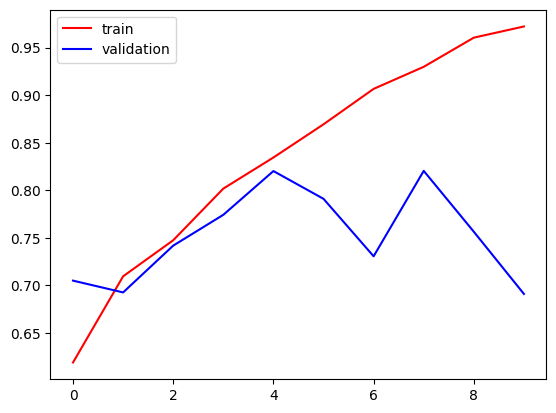

In [23]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()


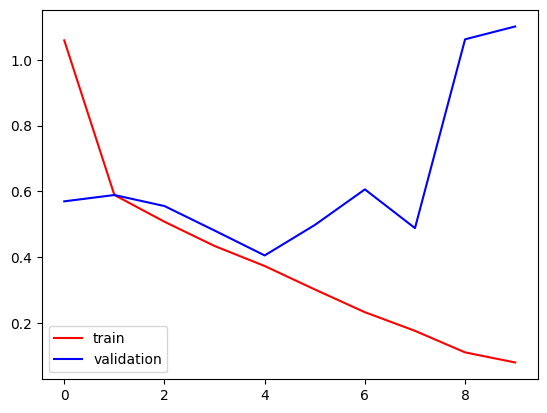

In [24]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [52]:
# ways to reduce  overfitting
#add more data
#data augmentation
#L1/L2 regularizer
#Dropout
#Batch Norm
#Reduce complexity

import cv2

In [86]:
test_img = cv2.imread('/content/dog.jpg')

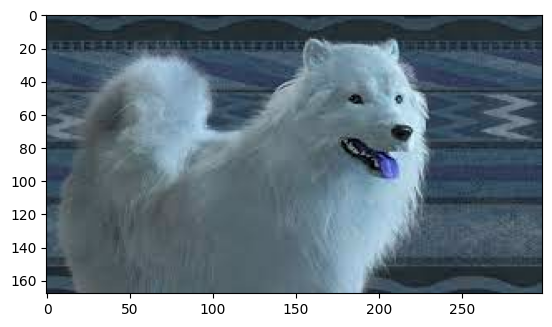

In [87]:
plt.imshow(test_img)

In [88]:
test_img.shape

(168, 299, 3)

In [89]:
test_img = cv2.resize(test_img,(256,256))

In [90]:
test_input = test_img.reshape((1,256,256,3))

In [91]:
model.predict(test_input)

1/1 [==============================] - 0s 19ms/step


array([[0.01595152]], dtype=float32)